In [1]:
from utils.imports import *

/home/leonard/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_paths = PATH['model_paths']
data_path = PATH['model_val']

In [3]:
model_fenge_path=model_paths + 'final_fenge_VGG.h5'
model_fenge = load_model(model_fenge_path, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})

In [4]:
lungs = [x for x in sorted(os.listdir(data_path + 'lung/')) if x != '.DS_Store']
nods = [x for x in sorted(os.listdir(data_path + 'nodule/')) if x != '.DS_Store']

In [5]:
mean=0.0
for scan in tqdm(lungs):
        patient_id = scan.split('/')[-1][:-4]
        img = cv2.imread(data_path + 'lung/' + scan,cv2.IMREAD_GRAYSCALE)   
        #seg_img, overlap = helpers.get_segmented_lungs(img.copy()*255)
        mask = cv2.imread(data_path + 'nodule/' + scan[:-5] + 'm.png',cv2.IMREAD_GRAYSCALE).astype(int) 
        
        
        #img = skimage.morphology.binary_opening(np.squeeze(img), np.ones([2,2])) 
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,0)   
        p = model_fenge.predict(img)
        mean += dice_coef_np(mask,p)
        p = np.squeeze(p)

100%|██████████| 798/798 [02:56<00:00,  4.51it/s]


In [6]:
print('VGG Benchmark:',mean/len(lungs)) 

('VGG Benchmark:', 0.7988635704729232)


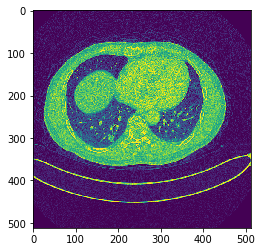

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(img))

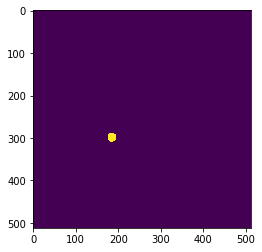

In [8]:
plt.imshow(np.squeeze(mask))

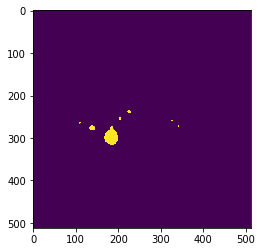

In [9]:
plt.imshow(np.squeeze(p))

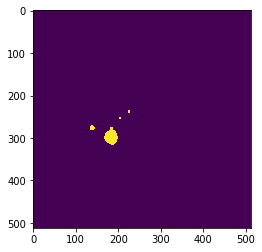

In [10]:
s=p.copy()
s[s==1]=int(1)
s[s!=1]=int(0)
s=np.squeeze(s)
s = skimage.morphology.binary_opening(s, np.ones([3,3]))
plt.imshow(s)